In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

#### 1. Вывести: кол-во наблюдений в датасете
#### 2. Вывести названия столбцов
#### 3. Определить самую частую позицию (item) в заказе 
#### 4. Построить гистрограмму частоты заказов по позициям (item )
#### 5. Измените тип переменной item_price c с помощью лямбды функции
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
#### 7. Средняя сумма заказа? (минимум 2 способа)
#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.
#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### 12. Определить цену по каждой позиции в отдельности. 


In [120]:
data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')

In [ ]:
data.head()

In [85]:
# 1 Вывести кол-во наблюдений в датасете
print(len(data))

4622


In [84]:
# 2 Вывести названия столбцов
print(*data.columns, sep='\n')

order_id
quantity
item_name
choice_description
item_price


In [121]:
# позиции со словом and атомарными не считаем, поэтому вынесем все, что после and, в choice_description

items_with_and = (data['item_name'].str.find(' and ') != -1)
data.loc[items_with_and, ('choice_description')] = data[items_with_and]['item_name'].apply(lambda x: '['+x.split(' and ')[1]+']')
data.loc[items_with_and, ('item_name')] = data[items_with_and]['item_name'].apply(lambda x: x.split(' and ')[0])

In [123]:
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips,[Fresh Tomato Salsa],$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips,[Tomatillo-Green Chili Salsa],$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [149]:
# 3 Определить самую частую позицию в заказе
# Примечание. Для нас важно только информация, встречается позиция в заказе или нет
# То есть если позиция встретилась в 1 заказе 5 раз, это равноценно тому, как если бы она встретилась в заказе хотя бы 1 раз
frequency = data.groupby('item_name')['order_id'].nunique()
print(frequency.sort_values().index[-1])

Chips


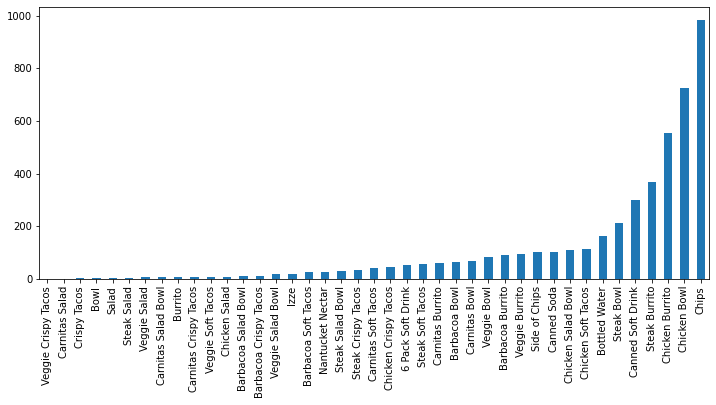

In [143]:
# 4 Построить гистрограмму частоты заказов по позициям
item_frequency = data['item_name'].value_counts()
item_frequency.sort_values().plot.bar(figsize=(12, 5))

In [131]:
# 5 Измените тип переменной item_price c с помощью лямбда функции
data['item_price'] = data['item_price'].apply(lambda x: float(x[1:]))

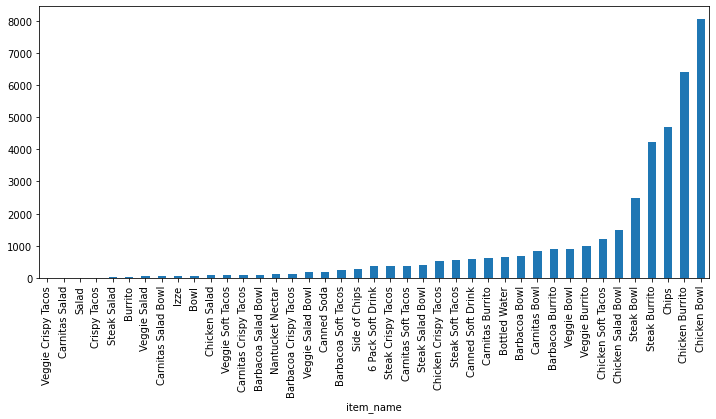

In [140]:
# 6 Построить гистограмму кол-во денег заработанных по каждой позиции
income = data.groupby('item_name').apply(lambda x: (x['item_price'] * x['quantity']).sum())
income.sort_values().plot.bar(figsize=(12, 5))

In [81]:
# 7 Средняя сумма заказа
# first variant
orders_number = len(data['order_id'].value_counts())
print((data['item_price'] * data['quantity']).sum() / orders_number)

21.39423118865867


In [60]:
# 8 Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
orders_data = data.groupby('order_id').size()
print('average:', orders_data.mean())
print('min:', orders_data.min())
print('max:', orders_data.max())
print('mode:', orders_data.mode()[0])

average: 2.520174482006543
min: 1
max: 23
mode: 2


In [ ]:
# 9 Определить статистику заказов стейков, а также статистику заказов прожарки

In [94]:
# 10 Добавить новый столбец цен на каждую позицию в заказе в рублях
exchange = 72.9
data['item_price_rubles'] = data['item_price'].apply(lambda x: x * exchange)
data.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_rubles
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,174.231
1,1,1,Izze,[Clementine],3.39,247.131
2,1,1,Nantucket Nectar,[Apple],3.39,247.131
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,174.231
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1237.842


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.